# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# Eksperimen Dataset Exam Score Prediction

https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset/data

Dataset ini memberikan representasi yang realistis mengenai berbagai faktor yang memengaruhi performa ujian siswa. Dataset terdiri dari 20.000 data siswa yang mencakup perilaku akademik, kebiasaan belajar, rutinitas gaya hidup, serta kondisi ujian.

Variabel yang tersedia antara lain:
- Jam belajar harian
- Persentase kehadiran kelas
- Durasi dan kualitas tidur
- Akses internet
- Metode belajar
- Penilaian fasilitas institusi
- Tingkat kesulitan ujian

Nilai ujian akhir (**exam_score**, rentang 0–100) dihitung menggunakan formula berbobot yang dirancang untuk menyerupai pola performa akademik di dunia nyata.

Dataset ini bersifat **synthetic**, tidak mengandung data pribadi, dan digunakan untuk keperluan pembelajaran, eksplorasi data, dan eksperimen machine learning.

## Tujuan Eksperimen
Melakukan eksplorasi data (EDA) dan preprocessing sebagai tahap awal dalam membangun pipeline machine learning end-to-end.

## Target
Target variabel pada eksperimen ini adalah **exam_score** (regression).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# load data dari Google Drive (direct download)
file_id = "1YpESUm_VF3oC0WrSrH4pEHLNaF4xmQZI"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

print("Dataset berhasil dimuat.")

Dataset berhasil dimuat.


In [3]:
# menampilkan 5 baris pertama dari dataset
df.head(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
# Informasi struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [5]:
# Statistik deskriptif
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# cek missing values
df.isnull().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


Berdasarkan hasil pengecekan missing values, dataset ini relatif bersih dan tidak memiliki nilai kosong yang signifikan.


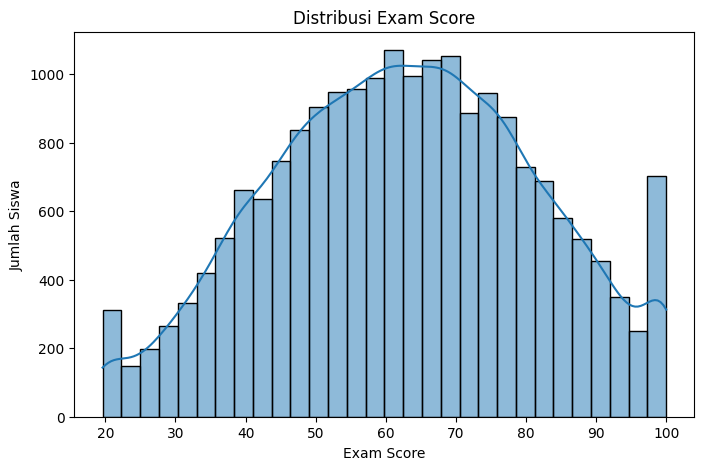

In [7]:
# distribusi exam_score
plt.figure(figsize=(8,5))
sns.histplot(df['exam_score'], bins=30, kde=True)
plt.title("Distribusi Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Jumlah Siswa")
plt.show()

Distribusi nilai ujian menunjukkan pola mendekati normal, dengan mayoritas siswa memiliki nilai di rentang menengah.


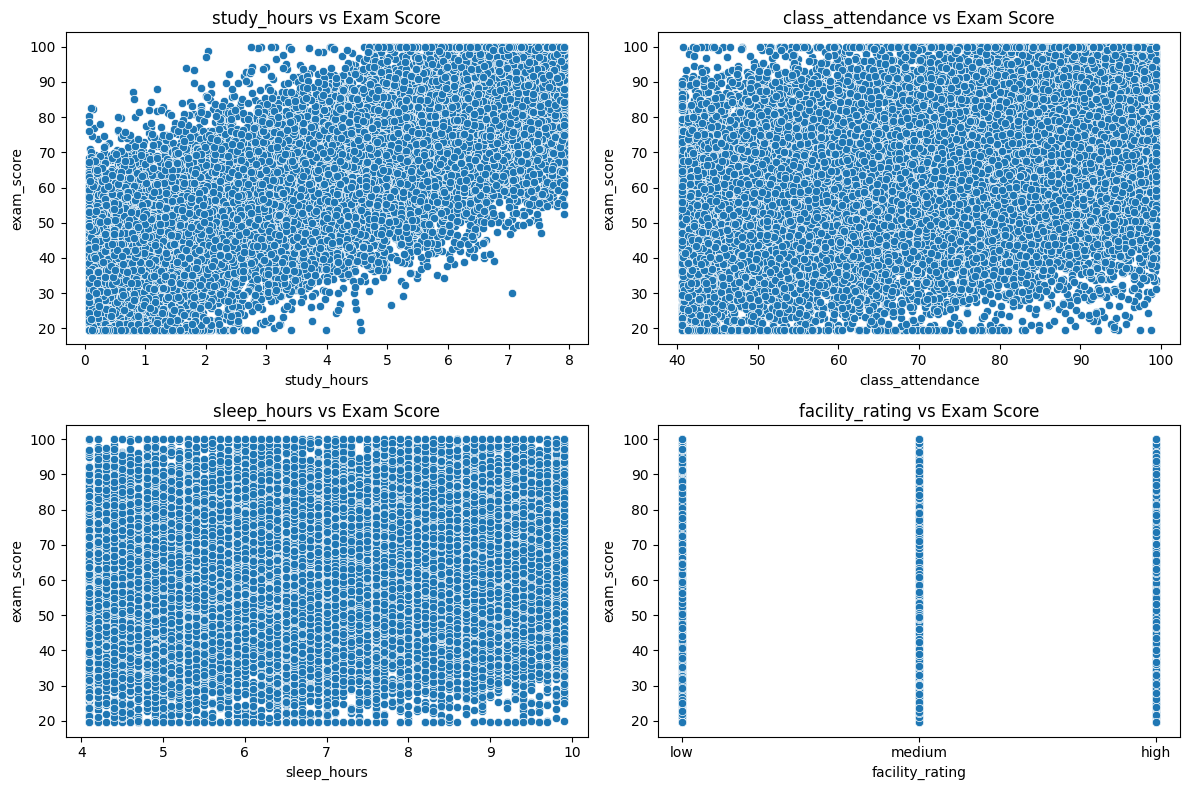

In [8]:
# analisis fitur numerik
numeric_cols = [
    'study_hours',
    'class_attendance',
    'sleep_hours',
    'facility_rating'
]

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['exam_score'])
    plt.title(f"{col} vs Exam Score")

plt.tight_layout()
plt.show()

Jam belajar, kehadiran kelas, dan kualitas fasilitas menunjukkan korelasi positif dengan nilai ujian.


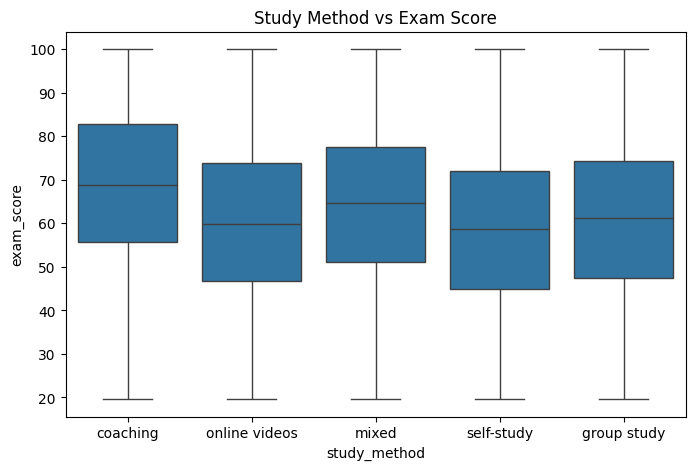

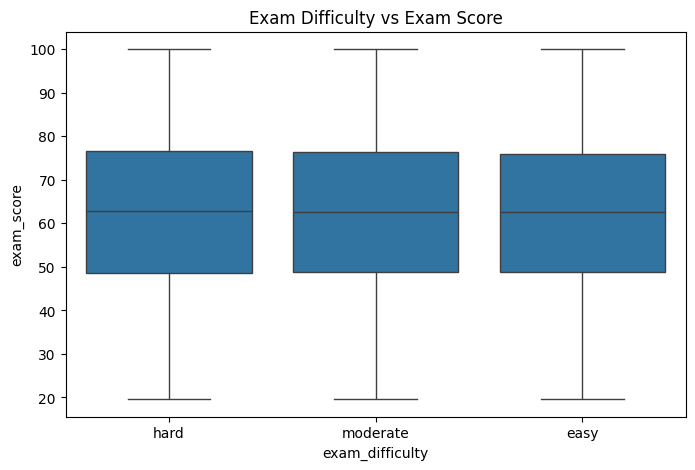

In [9]:
# analisis fitur kategorikal
plt.figure(figsize=(8,5))
sns.boxplot(x='study_method', y='exam_score', data=df)
plt.title("Study Method vs Exam Score")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='exam_difficulty', y='exam_score', data=df)
plt.title("Exam Difficulty vs Exam Score")
plt.show()

Siswa dengan metode belajar coaching dan mixed cenderung memiliki nilai lebih tinggi.
Tingkat kesulitan ujian juga berpengaruh signifikan terhadap nilai akhir.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
df_prep = df.copy()

In [11]:
# menghapus kolom ID
df_prep.drop(columns=['student_id'], inplace=True)

In [12]:
# cek duplikat
print("Jumlah duplikat:", df_prep.duplicated().sum())
df_prep = df_prep.drop_duplicates()

Jumlah duplikat: 0


In [13]:
# encoding data kategorikal
categorical_cols = [
    'gender',
    'course',
    'internet_access',
    'study_method',
    'exam_difficulty'
]
categorical_cols = [col for col in categorical_cols if col in df_prep.columns]

df_prep = pd.get_dummies(df_prep, columns=categorical_cols, drop_first=True)

In [14]:
# normalisasi fitur numerik
scaler = StandardScaler()

numeric_cols = [
    'age',
    'study_hours',
    'class_attendance',
    'sleep_hours',
]

df_prep[numeric_cols] = scaler.fit_transform(df_prep[numeric_cols])

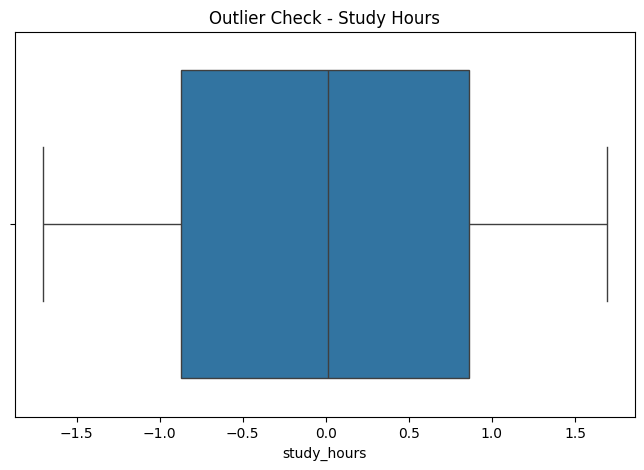

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_prep['study_hours'])
plt.title("Outlier Check - Study Hours")
plt.show()

Tidak ditemukan outlier ekstrem yang perlu dihapus, sehingga data tetap dipertahankan.
